In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
from helpers2 import *

In [2]:
do_data = pd.read_csv('../data/raw/DO data.csv')

In [3]:
do_data['dt'] = do_data['year'].astype(str) + '-' + do_data['month'].astype(str) + '-' + \
                do_data['day'].astype(str) + ' ' + do_data['time']

do_data['date_time'] = pd.to_datetime(do_data['dt'], errors = 'coerce')

do_data['date'] = do_data.date_time.map(lambda t : t.date())

do_data['time'] = do_data.date_time.map(lambda t : t.time())

do_data = do_data.drop(['dt'], axis = 1)

do_data = do_data.set_index(do_data['date_time'])

In [4]:
def month_n2s(n):
    if n == 10:
        return 'Oct, 29.9 (2004) / 30.7 (2005)'
    elif n == 11:
        return 'Nov, 26.3 (2004) / 27.8 (2005)'
    elif n == 12:
        return 'Dec, 21.8 (2004) / 23 (2005)'
    elif n == 1:
        return 'Jan, 19.5 (2005) / 20 (2006)'
    elif n == 2:
        return 'Feb, 20.7 (2005), / 22.7 (2006)'
    elif n == 3:
        return 'March, 23.8 (2005)'
    elif n == 4:
        return 'April, 28 (2005)'
    elif n == 5:
        return 'May, 31.6 (2005)'
    elif n == 6:
        return 'June, 33.4 (2005)'
    elif n == 7:
        return 'July, 35.3 (2005)'
    elif n == 8:
        return 'August, 35.7 (2005)'
    else:
        return 'Sep, 33.4 (2005)'

In [5]:
def day_n2s(n):
    if n == 0:
        return 'Mon'
    elif n == 1:
        return 'Tue'
    elif n == 2:
        return 'Wed'
    elif n == 3:
        return 'Thu'
    elif n == 4:
        return 'Fri'
    elif n == 5:
        return 'Sat'
    else:
        return 'Sun'

In [6]:
time_midnight = datetime.time(0)
time_2am = datetime.time(2)
time_4am = datetime.time(4)
time_6am = datetime.time(6)
time_8am = datetime.time(8)
time_10am = datetime.time(10)
time_noon = datetime.time(12)
time_2pm = datetime.time(14)
time_4pm = datetime.time(16)
time_6pm = datetime.time(18)
time_8pm = datetime.time(20)
time_10pm = datetime.time(22)
time_1159pm = datetime.time(23, 59, 59)

In [7]:
def time2bin(d):
    if time_midnight <= d < time_2am:
        return 0
    elif time_2am <= d < time_4am:
        return 1
    elif time_4am <= d < time_6am:
        return 2
    elif time_6am <= d < time_8am:
        return 3
    elif time_8am <= d < time_10am:
        return 4
    elif time_10am <= d < time_noon:
        return 5
    elif time_noon <= d < time_2pm:
        return 6
    elif time_2pm <= d < time_4pm:
        return 7
    elif time_4pm <= d < time_6pm:
        return 8
    elif time_6pm <= d < time_8pm:
        return 9
    elif time_8pm <= d < time_10pm:
        return 10
    elif time_10pm <= d <= time_1159pm:
        return 11

In [8]:
def bin2s(d):
    if d == 0:
        return 'midnight_2AM'
    elif d == 1:
        return '2AM_4AM'
    elif d == 2:
        return '4AM_6AM'
    elif d == 3:
        return '6AM_8AM'
    elif d == 4:
        return '8AM_10AM'
    elif d == 5:
        return '10AM_noon'
    elif d == 6:
        return 'noon_2PM'
    elif d == 7:
        return '2PM_4PM'
    elif d == 8:
        return '4PM_6PM'
    elif d == 9:
        return '6PM_8PM'
    elif d == 10:
        return '8PM_10PM'
    elif d == 11:
        return '10PM_midnight'

In [9]:
do_data['month_str'] = do_data.month.map(lambda n : month_n2s(n))

do_data['dayofweek_int'] = do_data.date_time.map(lambda x : x.weekday())

do_data['dayofweek_str'] = do_data.dayofweek_int.map(lambda x : day_n2s(x))

do_data['timebins_int'] = do_data.date_time.map(lambda t : time2bin(t.time()))

do_data['timebins_str'] = do_data.timebins_int.map(lambda t : bin2s(t))

In [10]:
do_data.head()

,time,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,date_time,date,month_str,dayofweek_int,dayofweek_str,timebins_int,timebins_str
date_time,,,,,,,,,,,,,,,,
2004-10-01 00:00:00,00:00:00,1,10,2004,1.72000,1.77,1.83000,2.13000,1.96,2004-10-01 00:00:00,2004-10-01,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,0,midnight_2AM
2004-10-01 01:29:28,01:29:28,1,10,2004,1.67000,1.61,2.04999,1.95000,1.80,2004-10-01 01:29:28,2004-10-01,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,0,midnight_2AM
2004-10-01 02:58:56,02:58:56,1,10,2004,2.08000,1.79,1.54000,1.79000,2.08,2004-10-01 02:58:56,2004-10-01,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,1,2AM_4AM
2004-10-01 04:28:24,04:28:24,1,10,2004,1.66000,1.32,2.21000,2.02999,1.64,2004-10-01 04:28:24,2004-10-01,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,2,4AM_6AM
2004-10-01 05:57:52,05:57:52,1,10,2004,2.05999,1.63,1.35000,1.61999,1.91,2004-10-01 05:57:52,2004-10-01,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,2,4AM_6AM


In [11]:
do_data.describe()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,timebins_int
count,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000
mean,15.596299,6.706388,2004.941066,2.833044,2.160476,2.097011,1.237851,2.268729,3.000589,5.495875
std,8.770109,3.877282,0.539223,2.466221,1.395776,1.737289,1.577389,2.414936,2.003151,3.455803
min,1.000000,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,8.000000,3.000000,2005.000000,1.670000,1.560000,1.140000,0.230000,0.430000,1.000000,2.000000
50%,16.000000,7.000000,2005.000000,2.249990,1.869990,1.790000,0.830000,1.770000,3.000000,5.000000
75%,23.000000,10.000000,2005.000000,3.069990,2.269990,2.340000,1.770000,2.799990,5.000000,9.000000
max,31.000000,12.000000,2006.000000,9.999990,9.999990,9.999990,9.999990,9.999990,6.000000,11.000000


In [12]:
do_data.describe()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,timebins_int
count,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000
mean,15.596299,6.706388,2004.941066,2.833044,2.160476,2.097011,1.237851,2.268729,3.000589,5.495875
std,8.770109,3.877282,0.539223,2.466221,1.395776,1.737289,1.577389,2.414936,2.003151,3.455803
min,1.000000,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,8.000000,3.000000,2005.000000,1.670000,1.560000,1.140000,0.230000,0.430000,1.000000,2.000000
50%,16.000000,7.000000,2005.000000,2.249990,1.869990,1.790000,0.830000,1.770000,3.000000,5.000000
75%,23.000000,10.000000,2005.000000,3.069990,2.269990,2.340000,1.770000,2.799990,5.000000,9.000000
max,31.000000,12.000000,2006.000000,9.999990,9.999990,9.999990,9.999990,9.999990,6.000000,11.000000


In [13]:
# month, dow, tb, Mtb

do_data_month = do_data.groupby('month')

do_data_dow = do_data.groupby('dayofweek_int')

do_data_tb = do_data.groupby('timebins_int')

do_data_mtb = do_data.groupby(['month', 'timebins_int'])

In [14]:
do_data_month.describe()

day                                                     year  \
       count       mean       std  min   25%   50%   75%   max  count   
month                                                                   
1      998.0  15.968938  8.952120  1.0  8.00  16.0  24.0  31.0  998.0   
2      998.0  14.476954  8.081392  1.0  7.25  14.0  21.0  28.0  998.0   
3      499.0  15.973948  8.957358  1.0  8.00  16.0  24.0  31.0  499.0   
4      499.0  15.472946  8.664008  1.0  8.00  15.0  23.0  30.0  499.0   
5      499.0  15.068136  8.807135  1.0  7.00  15.0  23.0  30.0  499.0   
6      499.0  15.474950  8.664709  1.0  8.00  15.0  23.0  30.0  499.0   
7      499.0  15.969940  8.957121  1.0  8.00  16.0  24.0  31.0  499.0   
8      499.0  15.969940  8.957121  1.0  8.00  16.0  24.0  31.0  499.0   
9      499.0  15.472946  8.664008  1.0  8.00  15.0  23.0  30.0  499.0   
10     998.0  15.968938  8.953801  1.0  8.00  16.0  24.0  31.0  998.0   
11     999.0  15.486486  8.667284  1.0  8.00  15.0  23.0  30.0  999.0   
12     998.0  15.965932  8.949812  1.0  8.00  16.0  24.0  31.0  998.0   

                    ... dayofweek_int      timebins_int                      \
              mean  ...           75%  max        count      mean       std   
month               ...                                                       
1      2005.500000  ...           5.0  6.0        998.0  5.503006  3.457362   
2      2005.500000  ...           5.0  6.0        998.0  5.482966  3.457321   
3      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
4      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
5      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
6      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
7      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
8      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
9      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
10     2004.500000  ...           5.0  6.0        998.0  5.503006  3.457362   
11     2004.499499  ...           5.0  6.0        999.0  5.483483  3.458815   
12     2004.500000  ...           5.0  6.0        998.0  5.503006  3.457362   

                                   
       min   25%  50%   75%   max  
month                              
1      0.0  2.25  5.0  8.75  11.0  
2      0.0  2.25  6.0  8.75  11.0  
3      0.0  2.50  5.0  8.50  11.0  
4      0.0  2.50  6.0  8.50  11.0  
5      0.0  2.50  5.0  8.50  11.0  
6      0.0  2.50  6.0  8.50  11.0  
7      0.0  2.50  5.0  8.50  11.0  
8      0.0  2.50  5.0  8.50  11.0  
9      0.0  2.50  6.0  8.50  11.0  
10     0.0  2.25  5.0  8.75  11.0  
11     0.0  2.00  6.0  8.50  11.0  
12     0.0  2.25  5.0  8.75  11.0  

[12 rows x 72 columns]

In [15]:
do_data_dow.describe()

day                                                   \
                count       mean       std  min  25%   50%   75%   max   
dayofweek_int                                                            
0              1215.0  16.002469  8.778390  1.0  8.0  16.0  24.0  31.0   
1              1222.0  15.394435  8.777432  1.0  8.0  15.0  23.0  31.0   
2              1200.0  15.316667  8.741667  1.0  8.0  15.0  23.0  31.0   
3              1198.0  15.491653  8.715278  1.0  8.0  16.0  23.0  31.0   
4              1220.0  15.492623  8.822604  1.0  8.0  16.0  23.0  31.0   
5              1213.0  15.622424  8.774545  1.0  8.0  16.0  23.0  31.0   
6              1216.0  15.850329  8.779642  1.0  8.0  16.0  24.0  31.0   

                month            ...   lane 5          timebins_int            \
                count      mean  ...      75%      max        count      mean   
dayofweek_int                    ...                                            
0              1215.0  6.620576  ...  2.56999  9.99999       1215.0  5.492181   
1              1222.0  6.665303  ...  2.90000  9.99999       1222.0  5.490180   
2              1200.0  6.747500  ...  2.91500  9.99999       1200.0  5.499167   
3              1198.0  6.777963  ...  2.73000  9.99999       1198.0  5.511686   
4              1220.0  6.849180  ...  2.75249  9.99999       1220.0  5.477869   
5              1213.0  6.705688  ...  2.98000  9.99999       1213.0  5.500412   
6              1216.0  6.579770  ...  2.88250  9.99999       1216.0  5.500000   

                                                     
                    std  min   25%  50%   75%   max  
dayofweek_int                                        
0              3.451914  0.0  2.50  5.0  8.00  11.0  
1              3.458350  0.0  2.00  5.0  8.00  11.0  
2              3.454216  0.0  2.75  6.0  8.25  11.0  
3              3.454845  0.0  3.00  6.0  9.00  11.0  
4              3.469355  0.0  2.00  5.0  9.00  11.0  
5              3.451604  0.0  3.00  6.0  9.00  11.0  
6              3.458633  0.0  2.75  5.5  9.00  11.0  

[7 rows x 72 columns]

In [16]:
do_data_tb.describe()

day                                                   month  \
              count       mean       std  min  25%   50%   75%   max  count   
timebins_int                                                                  
0             722.0  15.662050  8.937876  1.0  8.0  16.0  23.0  31.0  722.0   
1             697.0  15.803443  8.666894  1.0  8.0  16.0  24.0  31.0  697.0   
2             707.0  15.026874  8.837251  1.0  7.0  14.0  23.0  31.0  707.0   
3             706.0  16.066572  8.732256  1.0  9.0  16.0  23.0  31.0  706.0   
4             697.0  15.720230  8.680673  1.0  8.0  16.0  23.0  31.0  697.0   
5             715.0  15.086713  8.766870  1.0  7.5  15.0  23.0  31.0  715.0   
6             713.0  16.162693  8.809559  1.0  9.0  17.0  24.0  31.0  713.0   
7             705.0  15.567376  8.771973  1.0  7.0  16.0  24.0  31.0  705.0   
8             697.0  15.076040  8.736317  1.0  8.0  15.0  23.0  31.0  697.0   
9             711.0  16.195499  8.757116  1.0  9.0  16.0  24.0  31.0  711.0   
10            707.0  15.536068  8.798325  1.0  7.0  16.0  24.0  31.0  707.0   
11            707.0  15.246110  8.692674  1.0  8.0  15.0  23.0  31.0  707.0   

                        ...    lane 5          dayofweek_int            \
                  mean  ...       75%      max         count      mean   
timebins_int            ...                                              
0             6.709141  ...  2.497492  9.99999         722.0  2.997230   
1             6.705882  ...  2.579990  9.99999         697.0  3.002869   
2             6.708628  ...  2.615000  9.99999         707.0  2.998586   
3             6.689802  ...  2.767490  9.99999         706.0  3.012748   
4             6.705882  ...  3.049990  9.99999         697.0  3.000000   
5             6.724476  ...  3.135000  9.99999         715.0  2.983217   
6             6.687237  ...  3.150000  9.99999         713.0  3.009818   
7             6.721986  ...  2.960000  9.99999         705.0  2.987234   
8             6.705882  ...  2.620000  9.99999         697.0  2.998565   
9             6.700422  ...  2.725000  9.99999         711.0  3.023910   
10            6.708628  ...  2.670000  9.99999         707.0  2.973126   
11            6.708628  ...  2.455000  9.99999         707.0  3.019802   

                                                 
                   std  min  25%  50%  75%  max  
timebins_int                                     
0             2.006921  0.0  1.0  3.0  5.0  6.0  
1             1.993522  0.0  1.0  3.0  5.0  6.0  
2             2.010947  0.0  1.0  3.0  5.0  6.0  
3             2.011628  0.0  1.0  3.0  5.0  6.0  
4             1.990639  0.0  1.0  3.0  5.0  6.0  
5             2.016667  0.0  1.0  3.0  5.0  6.0  
6             2.005236  0.0  1.0  3.0  5.0  6.0  
7             1.996761  0.0  1.0  3.0  5.0  6.0  
8             2.009674  0.0  1.0  3.0  5.0  6.0  
9             2.009342  0.0  1.0  3.0  5.0  6.0  
10            1.995210  0.0  1.0  3.0  5.0  6.0  
11            2.005560  0.0  1.0  3.0  5.0  6.0  

[12 rows x 72 columns]

In [17]:
do_data_mtb.describe()

day                                                   \
                   count       mean       std  min  25%   50%   75%   max   
month timebins_int                                                          
1     0             84.0  16.297619  9.197668  1.0  9.0  16.5  24.0  31.0   
      1             82.0  16.121951  8.822516  1.0  8.0  16.0  24.0  31.0   
      2             84.0  15.214286  9.113834  1.0  7.0  14.5  23.0  31.0   
      3             82.0  16.682927  8.992285  1.0  9.0  17.0  24.0  31.0   
      4             82.0  16.121951  8.822516  1.0  8.0  16.0  24.0  31.0   
...                  ...        ...       ...  ...  ...   ...   ...   ...   
12    7             84.0  16.000000  9.016718  1.0  7.0  16.0  25.0  31.0   
      8             82.0  15.146341  8.948580  1.0  8.0  14.0  23.0  31.0   
      9             82.0  16.853659  8.948580  1.0  9.0  18.0  24.0  31.0   
      10            84.0  16.000000  9.016718  1.0  7.0  16.0  25.0  31.0   
      11            84.0  15.285714  8.885580  1.0  8.0  14.5  23.0  31.0   

                    year          ...    lane 5          dayofweek_int  \
                   count    mean  ...       75%      max         count   
month timebins_int                ...                                    
1     0             84.0  2005.5  ...  1.745000  4.12999          84.0   
      1             82.0  2005.5  ...  1.830000  4.45000          82.0   
      2             84.0  2005.5  ...  1.732500  4.12999          84.0   
      3             82.0  2005.5  ...  1.917500  4.12000          82.0   
      4             82.0  2005.5  ...  1.972500  9.17999          82.0   
...                  ...     ...  ...       ...      ...           ...   
12    7             84.0  2004.5  ...  3.182493  9.99999          84.0   
      8             82.0  2004.5  ...  2.612497  5.68999          82.0   
      9             82.0  2004.5  ...  2.650000  5.43999          82.0   
      10            84.0  2004.5  ...  2.387500  5.35000          84.0   
      11            84.0  2004.5  ...  2.410000  5.10000          84.0   

                                                                  
                        mean       std  min   25%  50%  75%  max  
month timebins_int                                                
1     0             3.047619  2.133523  0.0  1.00  3.0  5.0  6.0  
      1             3.036585  2.021154  0.0  1.00  3.0  5.0  6.0  
      2             2.964286  2.119595  0.0  1.00  3.0  5.0  6.0  
      3             3.000000  2.131481  0.0  1.00  3.0  5.0  6.0  
      4             3.036585  2.021154  0.0  1.00  3.0  5.0  6.0  
...                      ...       ...  ...   ...  ...  ...  ...  
12    7             3.000000  2.012012  0.0  1.00  3.0  5.0  6.0  
      8             3.073171  1.903736  0.0  2.00  3.0  5.0  6.0  
      9             3.073171  1.903736  0.0  2.00  3.0  5.0  6.0  
      10            3.000000  2.012012  0.0  1.00  3.0  5.0  6.0  
      11            3.035714  1.897661  0.0  1.75  3.0  5.0  6.0  

[144 rows x 64 columns]

In [18]:
do_data2, do_data_day, do_data_month, do_data_dayOfWeek, do_data_timeBins, do_data_monthTimeBins = getDataAndSummary()

In [19]:
do_data.describe()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,timebins_int
count,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000,8484.000000
mean,15.596299,6.706388,2004.941066,2.833044,2.160476,2.097011,1.237851,2.268729,3.000589,5.495875
std,8.770109,3.877282,0.539223,2.466221,1.395776,1.737289,1.577389,2.414936,2.003151,3.455803
min,1.000000,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,8.000000,3.000000,2005.000000,1.670000,1.560000,1.140000,0.230000,0.430000,1.000000,2.000000
50%,16.000000,7.000000,2005.000000,2.249990,1.869990,1.790000,0.830000,1.770000,3.000000,5.000000
75%,23.000000,10.000000,2005.000000,3.069990,2.269990,2.340000,1.770000,2.799990,5.000000,9.000000
max,31.000000,12.000000,2006.000000,9.999990,9.999990,9.999990,9.999990,9.999990,6.000000,11.000000


In [20]:
do_data_day.describe()

day                                          month        ...  \
           count  mean  std   min   25%   50%   75%   max count  mean  ...   
date                                                                   ...   
2004-10-01  17.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0  17.0  10.0  ...   
2004-10-02  16.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0  16.0  10.0  ...   
2004-10-03  16.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0  16.0  10.0  ...   
2004-10-04  16.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0  16.0  10.0  ...   
2004-10-05  16.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0  16.0  10.0  ...   
...          ...   ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   
2006-02-24  18.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0  18.0   2.0  ...   
2006-02-25  18.0  25.0  0.0  25.0  25.0  25.0  25.0  25.0  18.0   2.0  ...   
2006-02-26  18.0  26.0  0.0  26.0  26.0  26.0  26.0  26.0  18.0   2.0  ...   
2006-02-27  18.0  27.0  0.0  27.0  27.0  27.0  27.0  27.0  18.0   2.0  ...   
2006-02-28  17.0  28.0  0.0  28.0  28.0  28.0  28.0  28.0  17.0   2.0  ...   

           dayofweek_int      timebins_int                                 \
                     75%  max        count      mean       std  min   25%   
date                                                                        
2004-10-01           4.0  4.0         17.0  5.411765  3.725903  0.0  2.00   
2004-10-02           5.0  5.0         16.0  5.750000  3.568380  0.0  2.75   
2004-10-03           6.0  6.0         16.0  5.750000  3.568380  0.0  2.75   
2004-10-04           0.0  0.0         16.0  5.625000  3.442383  0.0  2.75   
2004-10-05           1.0  1.0         16.0  5.500000  3.540245  0.0  2.75   
...                  ...  ...          ...       ...       ...  ...   ...   
2006-02-24           4.0  4.0         18.0  5.333333  3.547990  0.0  2.25   
2006-02-25           5.0  5.0         18.0  5.444444  3.681787  0.0  2.25   
2006-02-26           6.0  6.0         18.0  5.666667  3.547990  0.0  3.00   
2006-02-27           0.0  0.0         18.0  5.666667  3.547990  0.0  3.00   
2006-02-28           1.0  1.0         17.0  5.529412  3.502100  0.0  3.00   

                             
            50%   75%   max  
date                         
2004-10-01  5.0  8.00  11.0  
2004-10-02  5.5  8.25  11.0  
2004-10-03  5.5  8.25  11.0  
2004-10-04  5.5  8.25  11.0  
2004-10-05  5.5  8.25  11.0  
...         ...   ...   ...  
2006-02-24  5.5  8.00  11.0  
2006-02-25  5.5  8.75  11.0  
2006-02-26  5.5  8.75  11.0  
2006-02-27  5.5  8.75  11.0  
2006-02-28  6.0  8.00  11.0  

[515 rows x 80 columns]

In [21]:
do_data_month.describe()

day                                                     year  \
       count       mean       std  min   25%   50%   75%   max  count   
month                                                                   
1      998.0  15.968938  8.952120  1.0  8.00  16.0  24.0  31.0  998.0   
2      998.0  14.476954  8.081392  1.0  7.25  14.0  21.0  28.0  998.0   
3      499.0  15.973948  8.957358  1.0  8.00  16.0  24.0  31.0  499.0   
4      499.0  15.472946  8.664008  1.0  8.00  15.0  23.0  30.0  499.0   
5      499.0  15.068136  8.807135  1.0  7.00  15.0  23.0  30.0  499.0   
6      499.0  15.474950  8.664709  1.0  8.00  15.0  23.0  30.0  499.0   
7      499.0  15.969940  8.957121  1.0  8.00  16.0  24.0  31.0  499.0   
8      499.0  15.969940  8.957121  1.0  8.00  16.0  24.0  31.0  499.0   
9      499.0  15.472946  8.664008  1.0  8.00  15.0  23.0  30.0  499.0   
10     998.0  15.968938  8.953801  1.0  8.00  16.0  24.0  31.0  998.0   
11     999.0  15.486486  8.667284  1.0  8.00  15.0  23.0  30.0  999.0   
12     998.0  15.965932  8.949812  1.0  8.00  16.0  24.0  31.0  998.0   

                    ... dayofweek_int      timebins_int                      \
              mean  ...           75%  max        count      mean       std   
month               ...                                                       
1      2005.500000  ...           5.0  6.0        998.0  5.503006  3.457362   
2      2005.500000  ...           5.0  6.0        998.0  5.482966  3.457321   
3      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
4      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
5      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
6      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
7      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
8      2005.000000  ...           5.0  6.0        499.0  5.503006  3.459097   
9      2005.000000  ...           5.0  6.0        499.0  5.488978  3.457920   
10     2004.500000  ...           5.0  6.0        998.0  5.503006  3.457362   
11     2004.499499  ...           5.0  6.0        999.0  5.483483  3.458815   
12     2004.500000  ...           5.0  6.0        998.0  5.503006  3.457362   

                                   
       min   25%  50%   75%   max  
month                              
1      0.0  2.25  5.0  8.75  11.0  
2      0.0  2.25  6.0  8.75  11.0  
3      0.0  2.50  5.0  8.50  11.0  
4      0.0  2.50  6.0  8.50  11.0  
5      0.0  2.50  5.0  8.50  11.0  
6      0.0  2.50  6.0  8.50  11.0  
7      0.0  2.50  5.0  8.50  11.0  
8      0.0  2.50  5.0  8.50  11.0  
9      0.0  2.50  6.0  8.50  11.0  
10     0.0  2.25  5.0  8.75  11.0  
11     0.0  2.00  6.0  8.50  11.0  
12     0.0  2.25  5.0  8.75  11.0  

[12 rows x 72 columns]

In [22]:
do_data_dayOfWeek.describe()

day                                                   \
                count       mean       std  min  25%   50%   75%   max   
dayofweek_int                                                            
0              1215.0  16.002469  8.778390  1.0  8.0  16.0  24.0  31.0   
1              1222.0  15.394435  8.777432  1.0  8.0  15.0  23.0  31.0   
2              1200.0  15.316667  8.741667  1.0  8.0  15.0  23.0  31.0   
3              1198.0  15.491653  8.715278  1.0  8.0  16.0  23.0  31.0   
4              1220.0  15.492623  8.822604  1.0  8.0  16.0  23.0  31.0   
5              1213.0  15.622424  8.774545  1.0  8.0  16.0  23.0  31.0   
6              1216.0  15.850329  8.779642  1.0  8.0  16.0  24.0  31.0   

                month            ...   lane 5          timebins_int            \
                count      mean  ...      75%      max        count      mean   
dayofweek_int                    ...                                            
0              1215.0  6.620576  ...  2.56999  9.99999       1215.0  5.492181   
1              1222.0  6.665303  ...  2.90000  9.99999       1222.0  5.490180   
2              1200.0  6.747500  ...  2.91500  9.99999       1200.0  5.499167   
3              1198.0  6.777963  ...  2.73000  9.99999       1198.0  5.511686   
4              1220.0  6.849180  ...  2.75249  9.99999       1220.0  5.477869   
5              1213.0  6.705688  ...  2.98000  9.99999       1213.0  5.500412   
6              1216.0  6.579770  ...  2.88250  9.99999       1216.0  5.500000   

                                                     
                    std  min   25%  50%   75%   max  
dayofweek_int                                        
0              3.451914  0.0  2.50  5.0  8.00  11.0  
1              3.458350  0.0  2.00  5.0  8.00  11.0  
2              3.454216  0.0  2.75  6.0  8.25  11.0  
3              3.454845  0.0  3.00  6.0  9.00  11.0  
4              3.469355  0.0  2.00  5.0  9.00  11.0  
5              3.451604  0.0  3.00  6.0  9.00  11.0  
6              3.458633  0.0  2.75  5.5  9.00  11.0  

[7 rows x 72 columns]

In [23]:
do_data_timeBins.describe()

day                                                   month  \
              count       mean       std  min  25%   50%   75%   max  count   
timebins_int                                                                  
0             722.0  15.662050  8.937876  1.0  8.0  16.0  23.0  31.0  722.0   
1             697.0  15.803443  8.666894  1.0  8.0  16.0  24.0  31.0  697.0   
2             707.0  15.026874  8.837251  1.0  7.0  14.0  23.0  31.0  707.0   
3             706.0  16.066572  8.732256  1.0  9.0  16.0  23.0  31.0  706.0   
4             697.0  15.720230  8.680673  1.0  8.0  16.0  23.0  31.0  697.0   
5             715.0  15.086713  8.766870  1.0  7.5  15.0  23.0  31.0  715.0   
6             713.0  16.162693  8.809559  1.0  9.0  17.0  24.0  31.0  713.0   
7             705.0  15.567376  8.771973  1.0  7.0  16.0  24.0  31.0  705.0   
8             697.0  15.076040  8.736317  1.0  8.0  15.0  23.0  31.0  697.0   
9             711.0  16.195499  8.757116  1.0  9.0  16.0  24.0  31.0  711.0   
10            707.0  15.536068  8.798325  1.0  7.0  16.0  24.0  31.0  707.0   
11            707.0  15.246110  8.692674  1.0  8.0  15.0  23.0  31.0  707.0   

                        ...    lane 5          dayofweek_int            \
                  mean  ...       75%      max         count      mean   
timebins_int            ...                                              
0             6.709141  ...  2.497492  9.99999         722.0  2.997230   
1             6.705882  ...  2.579990  9.99999         697.0  3.002869   
2             6.708628  ...  2.615000  9.99999         707.0  2.998586   
3             6.689802  ...  2.767490  9.99999         706.0  3.012748   
4             6.705882  ...  3.049990  9.99999         697.0  3.000000   
5             6.724476  ...  3.135000  9.99999         715.0  2.983217   
6             6.687237  ...  3.150000  9.99999         713.0  3.009818   
7             6.721986  ...  2.960000  9.99999         705.0  2.987234   
8             6.705882  ...  2.620000  9.99999         697.0  2.998565   
9             6.700422  ...  2.725000  9.99999         711.0  3.023910   
10            6.708628  ...  2.670000  9.99999         707.0  2.973126   
11            6.708628  ...  2.455000  9.99999         707.0  3.019802   

                                                 
                   std  min  25%  50%  75%  max  
timebins_int                                     
0             2.006921  0.0  1.0  3.0  5.0  6.0  
1             1.993522  0.0  1.0  3.0  5.0  6.0  
2             2.010947  0.0  1.0  3.0  5.0  6.0  
3             2.011628  0.0  1.0  3.0  5.0  6.0  
4             1.990639  0.0  1.0  3.0  5.0  6.0  
5             2.016667  0.0  1.0  3.0  5.0  6.0  
6             2.005236  0.0  1.0  3.0  5.0  6.0  
7             1.996761  0.0  1.0  3.0  5.0  6.0  
8             2.009674  0.0  1.0  3.0  5.0  6.0  
9             2.009342  0.0  1.0  3.0  5.0  6.0  
10            1.995210  0.0  1.0  3.0  5.0  6.0  
11            2.005560  0.0  1.0  3.0  5.0  6.0  

[12 rows x 72 columns]

In [24]:
do_data_monthTimeBins.describe()

day                                                   \
                   count       mean       std  min  25%   50%   75%   max   
month timebins_int                                                          
1     0             84.0  16.297619  9.197668  1.0  9.0  16.5  24.0  31.0   
      1             82.0  16.121951  8.822516  1.0  8.0  16.0  24.0  31.0   
      2             84.0  15.214286  9.113834  1.0  7.0  14.5  23.0  31.0   
      3             82.0  16.682927  8.992285  1.0  9.0  17.0  24.0  31.0   
      4             82.0  16.121951  8.822516  1.0  8.0  16.0  24.0  31.0   
...                  ...        ...       ...  ...  ...   ...   ...   ...   
12    7             84.0  16.000000  9.016718  1.0  7.0  16.0  25.0  31.0   
      8             82.0  15.146341  8.948580  1.0  8.0  14.0  23.0  31.0   
      9             82.0  16.853659  8.948580  1.0  9.0  18.0  24.0  31.0   
      10            84.0  16.000000  9.016718  1.0  7.0  16.0  25.0  31.0   
      11            84.0  15.285714  8.885580  1.0  8.0  14.5  23.0  31.0   

                    year          ...    lane 5          dayofweek_int  \
                   count    mean  ...       75%      max         count   
month timebins_int                ...                                    
1     0             84.0  2005.5  ...  1.745000  4.12999          84.0   
      1             82.0  2005.5  ...  1.830000  4.45000          82.0   
      2             84.0  2005.5  ...  1.732500  4.12999          84.0   
      3             82.0  2005.5  ...  1.917500  4.12000          82.0   
      4             82.0  2005.5  ...  1.972500  9.17999          82.0   
...                  ...     ...  ...       ...      ...           ...   
12    7             84.0  2004.5  ...  3.182493  9.99999          84.0   
      8             82.0  2004.5  ...  2.612497  5.68999          82.0   
      9             82.0  2004.5  ...  2.650000  5.43999          82.0   
      10            84.0  2004.5  ...  2.387500  5.35000          84.0   
      11            84.0  2004.5  ...  2.410000  5.10000          84.0   

                                                                  
                        mean       std  min   25%  50%  75%  max  
month timebins_int                                                
1     0             3.047619  2.133523  0.0  1.00  3.0  5.0  6.0  
      1             3.036585  2.021154  0.0  1.00  3.0  5.0  6.0  
      2             2.964286  2.119595  0.0  1.00  3.0  5.0  6.0  
      3             3.000000  2.131481  0.0  1.00  3.0  5.0  6.0  
      4             3.036585  2.021154  0.0  1.00  3.0  5.0  6.0  
...                      ...       ...  ...   ...  ...  ...  ...  
12    7             3.000000  2.012012  0.0  1.00  3.0  5.0  6.0  
      8             3.073171  1.903736  0.0  2.00  3.0  5.0  6.0  
      9             3.073171  1.903736  0.0  2.00  3.0  5.0  6.0  
      10            3.000000  2.012012  0.0  1.00  3.0  5.0  6.0  
      11            3.035714  1.897661  0.0  1.75  3.0  5.0  6.0  

[144 rows x 64 columns]

In [25]:
do_data2.equals(do_data)

True

In [18]:
do_data_month_medians = do_data_month.median()

do_data_dow_medians = do_data_dow.median()

do_data_tb_medians = do_data_tb.median()

do_data_mtb_medians = do_data_mtb.median()

In [19]:
do_data_month_medians.head()

,day,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,timebins_int
month,,,,,,,,,
1,16.0,2005.5,2.79499,1.86,2.41,1.640,1.04000,3.0,5.0
2,14.0,2005.5,2.10000,1.90,1.86,1.095,1.80000,3.0,6.0
3,16.0,2005.0,1.95000,1.97,2.14,0.500,2.12000,3.0,5.0
4,15.0,2005.0,9.99999,1.40,2.97,0.640,6.55999,3.0,6.0
5,15.0,2005.0,0.06000,1.89,1.61,1.560,1.68000,3.0,5.0


In [20]:
do_data_dow_medians.head()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,timebins_int
dayofweek_int,,,,,,,,,
0,16.0,7.0,2005.0,2.210000,1.86000,1.74,0.83,1.74999,5.0
1,15.0,7.0,2005.0,2.355000,1.86000,1.80,0.92,1.78000,5.0
2,15.0,7.0,2005.0,2.254990,1.84000,1.80,0.78,1.73000,6.0
3,16.0,7.0,2005.0,2.249990,1.85500,1.79,0.80,1.74000,6.0
4,16.0,7.0,2005.0,2.244995,1.86999,1.81,0.83,1.77500,5.0


In [21]:
do_data_tb_medians.head()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
timebins_int,,,,,,,,,
0,16,7,2005,2.01999,1.78,1.765,0.76,1.740,3
1,16,7,2005,2.12000,1.89,1.760,0.74,1.820,3
2,14,7,2005,2.34000,1.96,1.840,0.78,1.800,3
3,16,7,2005,2.43000,1.98,1.840,0.82,1.815,3
4,16,7,2005,2.55999,2.12,1.940,0.91,1.850,3


In [22]:
do_data_mtb_medians.head()

day    year    lane 1    lane 2   lane 3   lane 4  \
month timebins_int                                                       
1     0             16.5  2005.5  2.610000  1.860000  2.339995   1.635   
      1             16.0  2005.5  2.719995  1.805000  2.220000   1.535   
      2             14.5  2005.5  2.955000  1.845000  2.564990   1.650   
      3             17.0  2005.5  2.804990  1.960000  2.430000   1.695   
      4             16.0  2005.5  2.784990  1.889995  2.709995   1.680   

                    lane 5  dayofweek_int  
month timebins_int                         
1     0              0.825            3.0  
      1              0.735            3.0  
      2              0.945            3.0  
      3              1.200            3.0  
      4              1.355            3.0

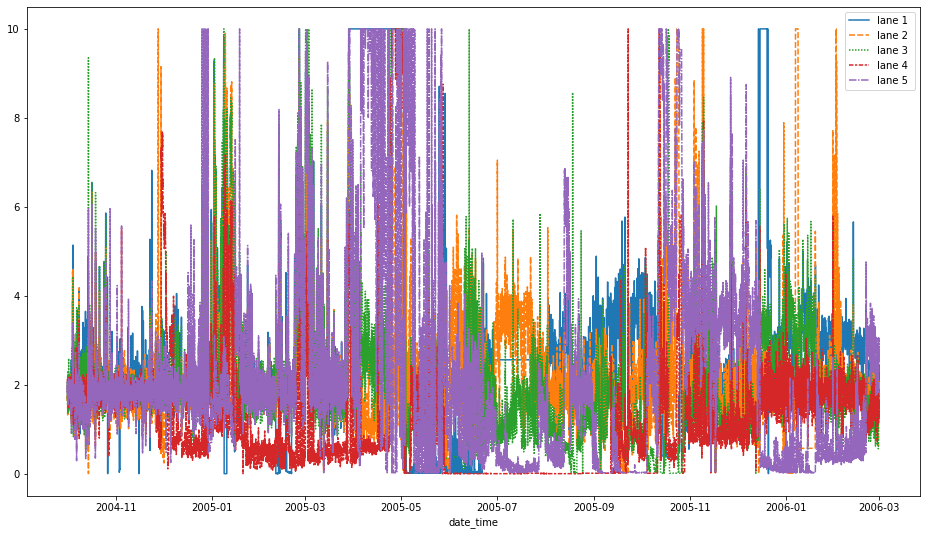

In [23]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])

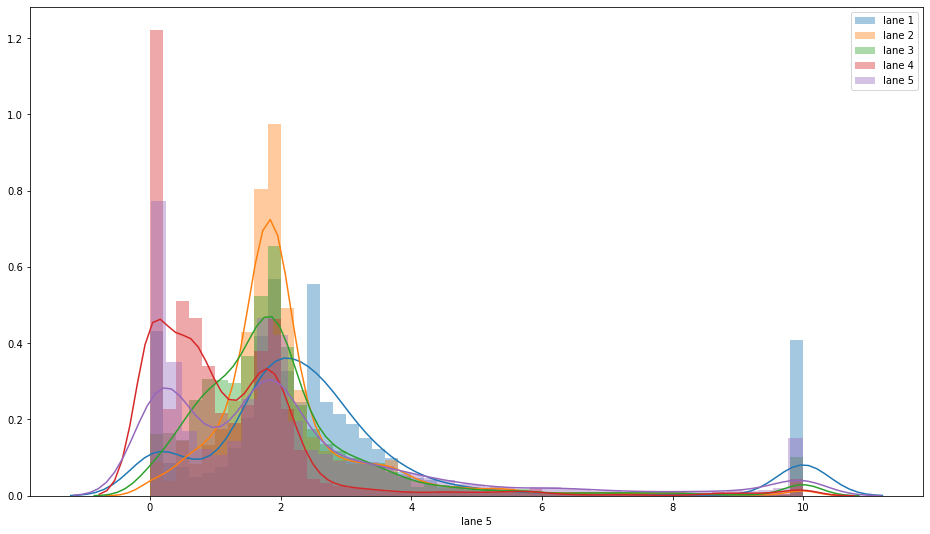

In [24]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data['lane 1'], label = 'lane 1')
sns.distplot(a=do_data['lane 2'], label = 'lane 2')
sns.distplot(a=do_data['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

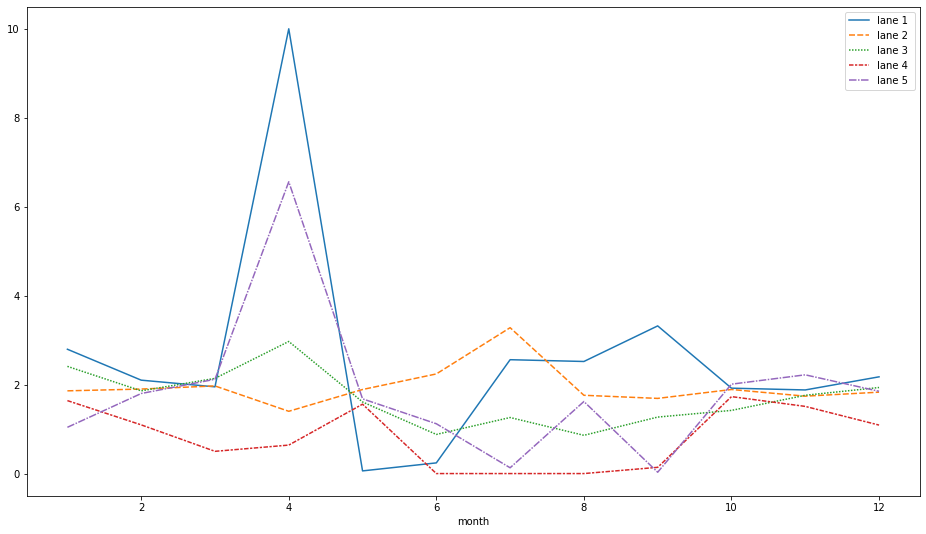

In [25]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_month_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])

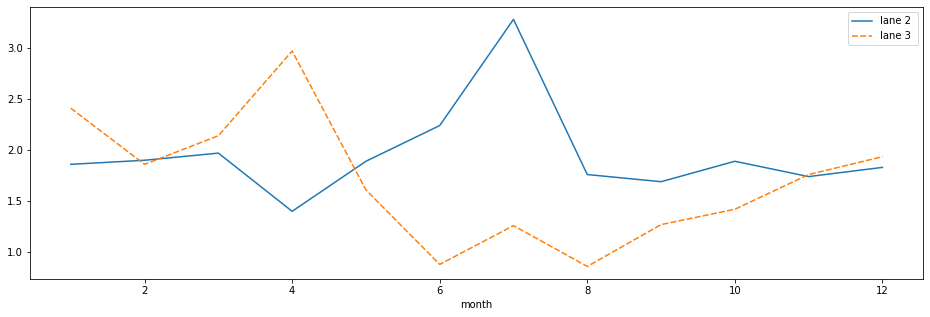

In [26]:
plt.figure(figsize = (16,5))

sns.lineplot(data = do_data_month_medians[['lane 2', 'lane 3 ']])

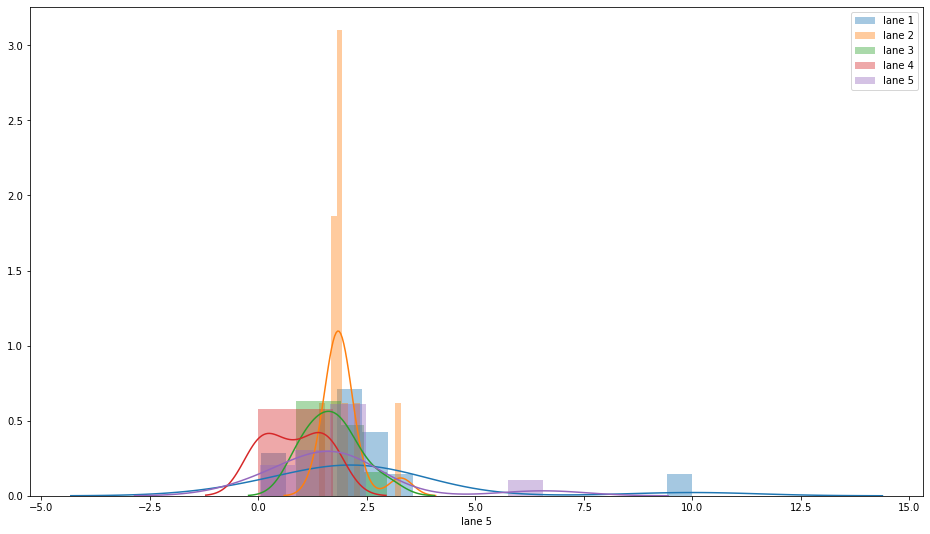

In [27]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_month_medians['lane 1'], label = 'lane 1')#, rug = True)
sns.distplot(a=do_data_month_medians['lane 2'], label = 'lane 2')#, rug = True)
sns.distplot(a=do_data_month_medians['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data_month_medians['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data_month_medians['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

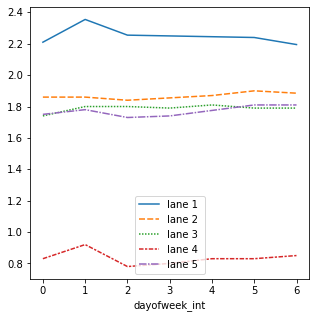

In [28]:
plt.figure(figsize = (5, 5))

sns.lineplot(data = do_data_dow_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])

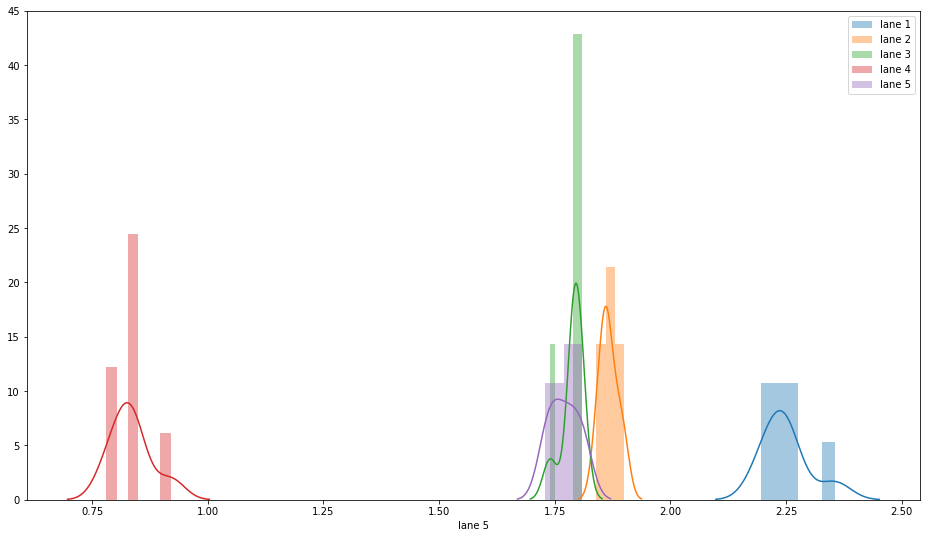

In [29]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_dow_medians['lane 1'], label = 'lane 1')#, rug = True)
sns.distplot(a=do_data_dow_medians['lane 2'], label = 'lane 2')#, rug = True)
sns.distplot(a=do_data_dow_medians['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data_dow_medians['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data_dow_medians['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

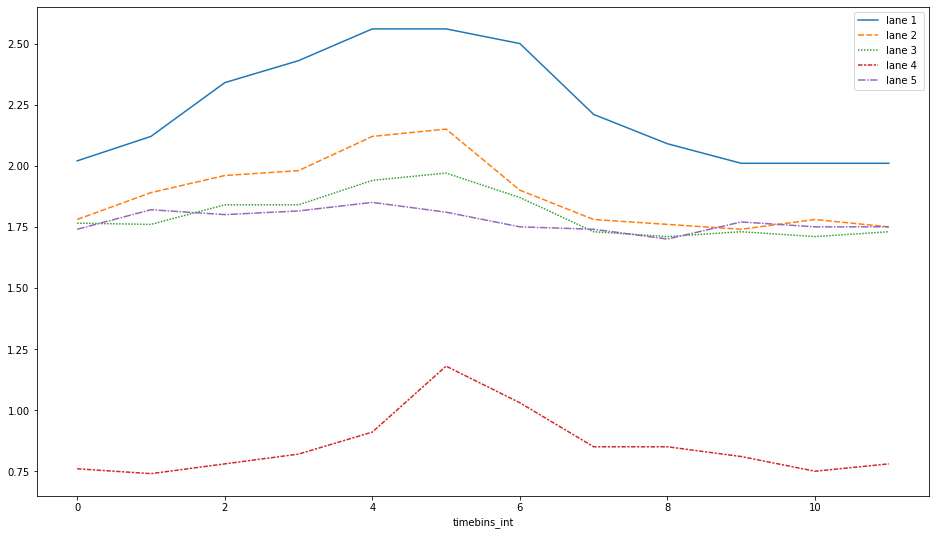

In [30]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_tb_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])

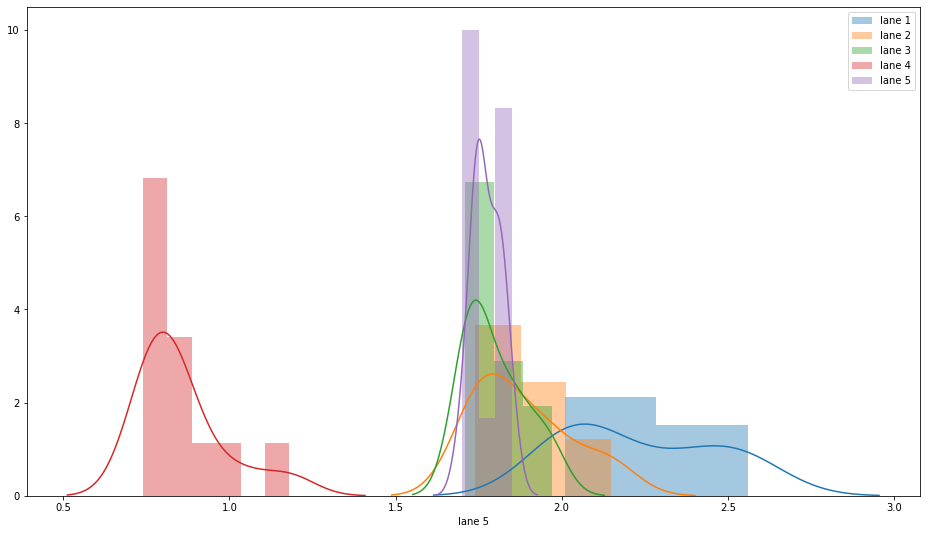

In [31]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_tb_medians['lane 1'], label = 'lane 1')#, rug = True)
sns.distplot(a=do_data_tb_medians['lane 2'], label = 'lane 2')#, rug = True)
sns.distplot(a=do_data_tb_medians['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data_tb_medians['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data_tb_medians['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

In [32]:
do_data_mtb_medians = do_data_mtb_medians.reset_index()

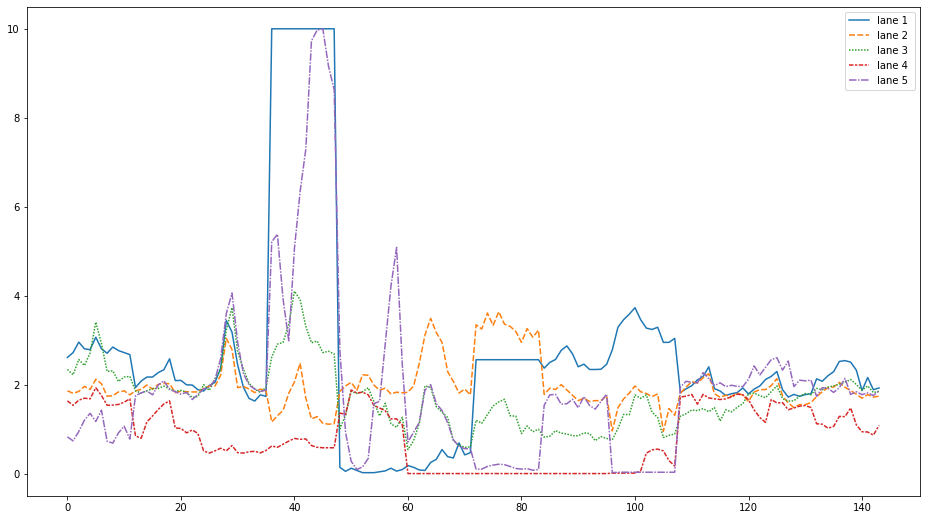

In [33]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_mtb_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])

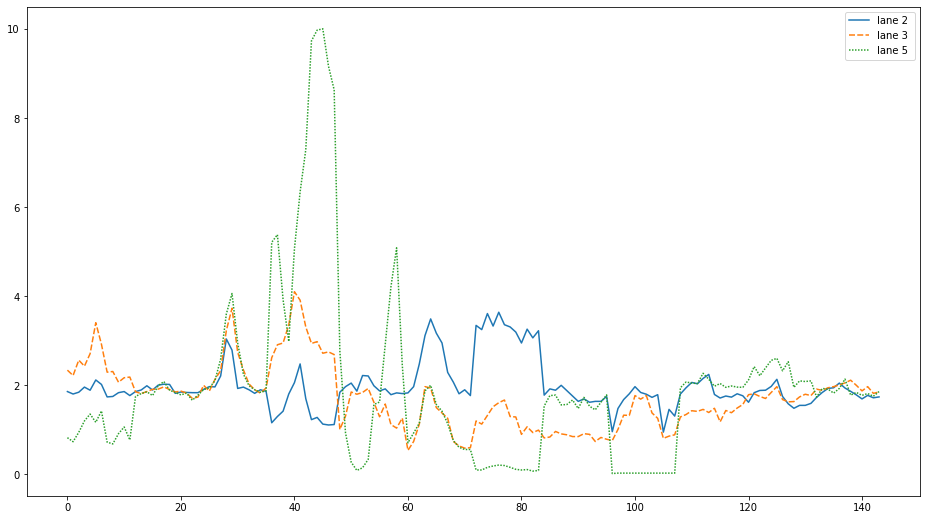

In [34]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_mtb_medians[['lane 2', 'lane 3 ', 'lane 5']])

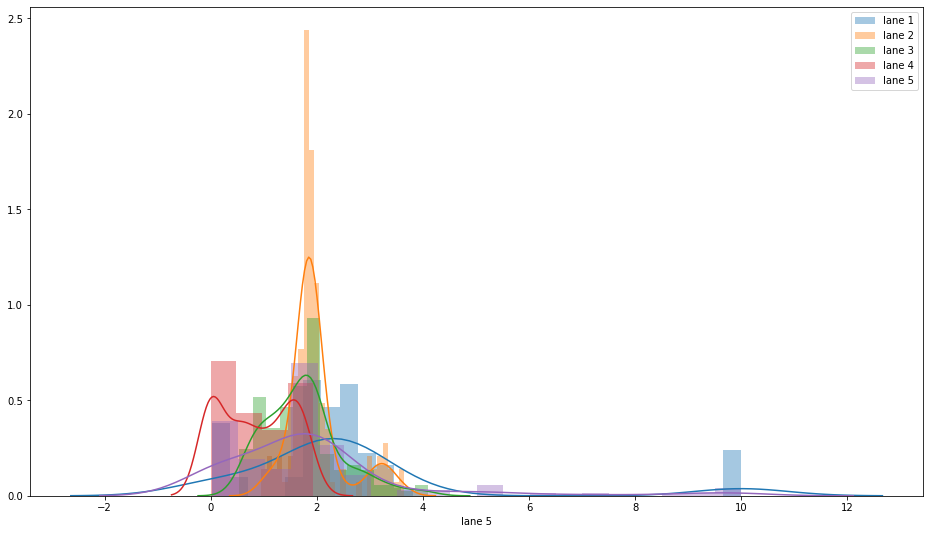

In [35]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_mtb_medians['lane 1'], label = 'lane 1')#, rug = True)
sns.distplot(a=do_data_mtb_medians['lane 2'], label = 'lane 2')#, rug = True)
sns.distplot(a=do_data_mtb_medians['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data_mtb_medians['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data_mtb_medians['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

In [36]:
do_data_tb_medians.head()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
timebins_int,,,,,,,,,
0,16,7,2005,2.01999,1.78,1.765,0.76,1.740,3
1,16,7,2005,2.12000,1.89,1.760,0.74,1.820,3
2,14,7,2005,2.34000,1.96,1.840,0.78,1.800,3
3,16,7,2005,2.43000,1.98,1.840,0.82,1.815,3
4,16,7,2005,2.55999,2.12,1.940,0.91,1.850,3


In [37]:
do_data_mtb_medians.head()

,month,timebins_int,day,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
0,1,0,16.5,2005.5,2.610000,1.860000,2.339995,1.635,0.825,3.0
1,1,1,16.0,2005.5,2.719995,1.805000,2.220000,1.535,0.735,3.0
2,1,2,14.5,2005.5,2.955000,1.845000,2.564990,1.650,0.945,3.0
3,1,3,17.0,2005.5,2.804990,1.960000,2.430000,1.695,1.200,3.0
4,1,4,16.0,2005.5,2.784990,1.889995,2.709995,1.680,1.355,3.0


In [38]:
do_data_tb_medians['timebins_str'] = do_data_tb_medians.index.map(lambda t : bin2s(t))

In [39]:
do_data_tb_medians

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,timebins_str
timebins_int,,,,,,,,,,
0,16,7,2005,2.01999,1.78000,1.76500,0.76,1.74000,3,midnight_2AM
1,16,7,2005,2.12000,1.89000,1.76000,0.74,1.82000,3,2AM_4AM
2,14,7,2005,2.34000,1.96000,1.84000,0.78,1.80000,3,4AM_6AM
3,16,7,2005,2.43000,1.98000,1.84000,0.82,1.81500,3,6AM_8AM
4,16,7,2005,2.55999,2.12000,1.94000,0.91,1.85000,3,8AM_10AM
5,15,7,2005,2.55999,2.15000,1.97000,1.18,1.81000,3,10AM_noon
6,17,7,2005,2.49999,1.90000,1.86999,1.03,1.74999,3,noon_2PM
7,16,7,2005,2.21000,1.78000,1.73000,0.85,1.74000,3,2PM_4PM
8,15,7,2005,2.09000,1.76000,1.71000,0.85,1.70000,3,4PM_6PM


In [40]:
do_data_tb_medians = do_data_tb_medians.drop(columns = ['day', 'month', 'year', 'dayofweek_int'])

In [41]:
do_data_tb_medians.to_csv('do_data_tb_medians.csv')

In [42]:
do_data_mtb_medians.head()

,month,timebins_int,day,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
0,1,0,16.5,2005.5,2.610000,1.860000,2.339995,1.635,0.825,3.0
1,1,1,16.0,2005.5,2.719995,1.805000,2.220000,1.535,0.735,3.0
2,1,2,14.5,2005.5,2.955000,1.845000,2.564990,1.650,0.945,3.0
3,1,3,17.0,2005.5,2.804990,1.960000,2.430000,1.695,1.200,3.0
4,1,4,16.0,2005.5,2.784990,1.889995,2.709995,1.680,1.355,3.0


In [43]:
do_data_mtb_medians = do_data_mtb_medians.drop(columns = ['day', 'dayofweek_int'])

In [44]:
do_data_mtb_medians['timebins_str'] = do_data_mtb_medians.timebins_int.map(lambda t : bin2s(t))

In [45]:
do_data_mtb_medians['month_str'] = do_data_mtb_medians.month.map(lambda t : month_n2s(t))

In [46]:
do_data_mtb_medians.to_csv('do_data_mtb_medians.csv')

In [47]:
# do_data_tb_medians['timebins_str'] = do_data_tb_medians.index.map(lambda t : bin2s(t))